In [1]:
import pandas as pd
import CococoNet_reader 
import pandas as pd
import numpy as np
import itertools
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import bottleneck as bn

In [2]:
maize_arab_map = pd.read_csv('/data/CoCoCoNet/orthologMaps/arabidopsis_maize_orthoNM.csv')

In [3]:
maize_arab_map_one_to_one = maize_arab_map.drop_duplicates(subset='arabidopsis', keep= False,)
maize_arab_map_one_to_one = maize_arab_map_one_to_one.drop_duplicates(subset= 'maize', keep= False)
maize_arab_map_one_to_one

,arabidopsis,maize,arabidopsis_OrthoID,maize_OrthoID
5,AT5G42760,Zm00001d034249,3702_0:0069ac,4577_0:000007
8,AT1G79120,Zm00001d033415,3702_0:000e09,4577_0:00000e
9,AT4G33330,Zm00001d027938,3702_0:004f05,4577_0:000011
14,AT3G02090,Zm00001d028194,3702_0:00335c,4577_0:000017
18,AT1G69220,Zm00001d034055,3702_0:000479,4577_0:000022
...,...,...,...,...
37574,AT2G07696,GRMZM5G890451,3702_0:006ac8,4577_0:00916d
37575,AT3G03600,GRMZM5G851130,3702_0:00304f,4577_0:009170
37576,AT2G07707,GRMZM5G816772,3702_0:002022,4577_0:009198
37577,AT2G07722,GRMZM5G899452,3702_0:006abf,4577_0:0091af


In [4]:
dictionary_mapper_arab_to_maize = maize_arab_map_one_to_one.set_index("arabidopsis").to_dict()['maize']
dictionary_mapper_maize_to_arab = maize_arab_map_one_to_one.set_index('maize').to_dict()['arabidopsis']



In [5]:
arab_cococonet = CococoNet_reader.read_cococonet('arabidopsis')
maize_cococonet = CococoNet_reader.read_cococonet('maize')


In [6]:
maize_cococonet

,Zm00001d027231,Zm00001d027232,Zm00001d027233,Zm00001d027236,Zm00001d027239,Zm00001d027240,Zm00001d027242,Zm00001d027248,Zm00001d027253,Zm00001d027254,...,ENSRNA049478584,ENSRNA049478607,ENSRNA049478600,Zm00001d000447,Zm00001d000452,ENSRNA049479090,ENSRNA049478822,ENSRNA049478534,ENSRNA049478530,ENSRNA049478881
Zm00001d027231,1.000000,0.078108,0.108838,0.461957,0.800930,0.319041,0.760313,0.660045,0.359478,0.588317,...,0.200135,0.149610,0.229181,0.073480,0.382390,0.226575,0.207282,0.175594,0.204687,0.181446
Zm00001d027232,0.078108,1.000000,0.876293,0.694633,0.214400,0.120976,0.026657,0.382087,0.287655,0.447700,...,0.078462,0.039292,0.145391,0.032343,0.135960,0.032805,0.034453,0.028501,0.069983,0.055660
Zm00001d027233,0.108838,0.876293,1.000000,0.670667,0.536561,0.207089,0.146332,0.328618,0.438306,0.540782,...,0.037824,0.038944,0.072977,0.011442,0.277296,0.015186,0.047389,0.013844,0.054827,0.073887
Zm00001d027236,0.461957,0.694633,0.670667,1.000000,0.656247,0.302919,0.200345,0.460549,0.135278,0.479839,...,0.044842,0.012275,0.142607,0.149006,0.417343,0.057754,0.107408,0.058877,0.062916,0.111273
Zm00001d027239,0.800930,0.214400,0.536561,0.656247,1.000000,0.457139,0.921456,0.095157,0.205044,0.489878,...,0.131221,0.093305,0.128835,0.103421,0.667229,0.090521,0.056203,0.156326,0.082495,0.167994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSRNA049479090,0.226575,0.032805,0.015186,0.057754,0.090521,0.100821,0.150854,0.062272,0.111443,0.113159,...,0.967584,0.893915,0.957201,0.048170,0.045550,1.000000,0.960540,0.979233,0.984839,0.986418
ENSRNA049478822,0.207282,0.034453,0.047389,0.107408,0.056203,0.110707,0.080529,0.061199,0.056742,0.055877,...,0.946128,0.900723,0.943176,0.043434,0.028705,0.960540,1.000000,0.978136,0.966372,0.981323
ENSRNA049478534,0.175594,0.028501,0.013844,0.058877,0.156326,0.145373,0.157355,0.106117,0.138546,0.235968,...,0.972773,0.914726,0.980563,0.119946,0.058226,0.979233,0.978136,1.000000,0.977791,0.985272
ENSRNA049478530,0.204687,0.069983,0.054827,0.062916,0.082495,0.110693,0.165403,0.207660,0.066610,0.087071,...,0.992406,0.935132,0.974161,0.017457,0.031221,0.984839,0.966372,0.977791,1.000000,0.994383


In [7]:
maize_arab_map['Group ID'] = 'Unassigned'

In [8]:
maize_arab_map

,arabidopsis,maize,arabidopsis_OrthoID,maize_OrthoID,Group ID
0,AT2G15730,Zm00001d031420,3702_0:001f0c,4577_0:000001,Unassigned
1,AT4G34420,Zm00001d031420,3702_0:004867,4577_0:000001,Unassigned
2,AT3G50620,Zm00001d031420,3702_0:00343c,4577_0:000001,Unassigned
3,AT5G44040,Zm00001d027589,3702_0:0059af,4577_0:000005,Unassigned
4,AT1G04030,Zm00001d027589,3702_0:000ec7,4577_0:000005,Unassigned
...,...,...,...,...,...
37574,AT2G07696,GRMZM5G890451,3702_0:006ac8,4577_0:00916d,Unassigned
37575,AT3G03600,GRMZM5G851130,3702_0:00304f,4577_0:009170,Unassigned
37576,AT2G07707,GRMZM5G816772,3702_0:002022,4577_0:009198,Unassigned
37577,AT2G07722,GRMZM5G899452,3702_0:006abf,4577_0:0091af,Unassigned


In [9]:
id_indexer = 0
for gene_pair in maize_arab_map.iterrows():
    
    if gene_pair[1]['Group ID'] == 'Unassigned':
        current_arab_gene = gene_pair[1]['arabidopsis']
        current_maize_gene = gene_pair[1]['maize']
        maize_arab_map['Group ID'].loc[(maize_arab_map['arabidopsis'] == current_arab_gene) & (maize_arab_map['Group ID'] == 'Unassigned')] = id_indexer
        maize_arab_map['Group ID'].loc[(maize_arab_map['maize'] == current_maize_gene) & (maize_arab_map['Group ID'] == 'Unassigned')] = id_indexer

        all_labeled_groups = maize_arab_map.loc[maize_arab_map['Group ID'] == id_indexer]

        all_labeled_groups_arab_genes = all_labeled_groups['arabidopsis'].to_list()
        all_labeled_groups_maize_genes = all_labeled_groups['maize'].to_list()

        maize_arab_map['Group ID'].loc[maize_arab_map['arabidopsis'].isin(all_labeled_groups_arab_genes)] = id_indexer
        maize_arab_map['Group ID'].loc[maize_arab_map['maize'].isin(all_labeled_groups_maize_genes)] = id_indexer

        id_indexer += 1




In [10]:
# id_indexer = 0
# for gene_pair in maize_arab_map.iterrows():
#     if gene_pair[0] == 2643:
#         break

In [11]:
maize_arab_map

,arabidopsis,maize,arabidopsis_OrthoID,maize_OrthoID,Group ID
0,AT2G15730,Zm00001d031420,3702_0:001f0c,4577_0:000001,0
1,AT4G34420,Zm00001d031420,3702_0:004867,4577_0:000001,0
2,AT3G50620,Zm00001d031420,3702_0:00343c,4577_0:000001,0
3,AT5G44040,Zm00001d027589,3702_0:0059af,4577_0:000005,1
4,AT1G04030,Zm00001d027589,3702_0:000ec7,4577_0:000005,1
...,...,...,...,...,...
37574,AT2G07696,GRMZM5G890451,3702_0:006ac8,4577_0:00916d,8107
37575,AT3G03600,GRMZM5G851130,3702_0:00304f,4577_0:009170,8108
37576,AT2G07707,GRMZM5G816772,3702_0:002022,4577_0:009198,8109
37577,AT2G07722,GRMZM5G899452,3702_0:006abf,4577_0:0091af,8110


In [12]:
maize_arab_map.loc[maize_arab_map['arabidopsis'] == 'AT1G13970']

,arabidopsis,maize,arabidopsis_OrthoID,maize_OrthoID,Group ID
2643,AT1G13970,Zm00001d029566,3702_0:001b21,4577_0:000a69,1036
20936,AT1G13970,Zm00001d013239,3702_0:001b21,4577_0:004e4d,1036
37568,AT1G13970,Zm00001d000143,3702_0:001b21,4577_0:009103,1036


In [13]:
maize_arab_map.loc[maize_arab_map['maize'] == 'Zm00001d029566']

,arabidopsis,maize,arabidopsis_OrthoID,maize_OrthoID,Group ID
2642,AT3G29180,Zm00001d029566,3702_0:003133,4577_0:000a69,1036
2643,AT1G13970,Zm00001d029566,3702_0:001b21,4577_0:000a69,1036
2644,AT5G39430,Zm00001d029566,3702_0:006305,4577_0:000a69,1036


In [14]:
id_indexer = 1116

In [15]:
# all_labeled_groups = maize_arab_map.loc[maize_arab_map['Group ID'] == id_indexer]
# all_labeled_groups_arab_genes = all_labeled_groups['arabidopsis'].to_list()
# all_labeled_groups_maize_genes = all_labeled_groups['maize'].to_list()

# maize_arab_map['Group ID'].loc[maize_arab_map['arabidopsis'].isin(all_labeled_groups_arab_genes)] = id_indexer
# maize_arab_map['Group ID'].loc[maize_arab_map['maize'].isin(all_labeled_groups_maize_genes)] = id_indexer
# maize_arab_map.loc[maize_arab_map['maize'].isin(all_labeled_groups_maize_genes)]


In [16]:
maize_arab_map.loc[maize_arab_map['Group ID'] == 0]

,arabidopsis,maize,arabidopsis_OrthoID,maize_OrthoID,Group ID
0,AT2G15730,Zm00001d031420,3702_0:001f0c,4577_0:000001,0
1,AT4G34420,Zm00001d031420,3702_0:004867,4577_0:000001,0
2,AT3G50620,Zm00001d031420,3702_0:00343c,4577_0:000001,0
293,AT3G50620,Zm00001d029417,3702_0:00343c,4577_0:000151,0
294,AT2G15730,Zm00001d029417,3702_0:001f0c,4577_0:000151,0
295,AT4G34420,Zm00001d029417,3702_0:004867,4577_0:000151,0
18054,AT3G50620,Zm00001d052886,3702_0:00343c,4577_0:0042a3,0
18055,AT4G34420,Zm00001d052886,3702_0:004867,4577_0:0042a3,0
18056,AT2G15730,Zm00001d052886,3702_0:001f0c,4577_0:0042a3,0
27531,AT3G50620,Zm00001d022334,3702_0:00343c,4577_0:0067f2,0


In [17]:
all_pairs_to_evaluate_for_functional_conservation = pd.DataFrame(columns = ['Arabidopsis','Maize','Group Number'])
for group_number in list(set(maize_arab_map['Group ID'].to_list())):
    current_gene_map = maize_arab_map.loc[maize_arab_map['Group ID'] == group_number]
    list_of_arab_genes_in_group = list(set(current_gene_map['arabidopsis'].to_list()))
    list_of_maize_genes_in_group = list(set(current_gene_map['maize'].to_list()))
    all_combo_list_current_genes = itertools.product(list_of_arab_genes_in_group,list_of_maize_genes_in_group)
    all_combo_list_current_genes = list(map(list,all_combo_list_current_genes))
    current_list_of_pairs = pd.DataFrame(all_combo_list_current_genes,columns = ['Arabidopsis','Maize'])
    current_list_of_pairs['Group Number'] = group_number
    all_pairs_to_evaluate_for_functional_conservation = all_pairs_to_evaluate_for_functional_conservation.append(current_list_of_pairs)





In [18]:
all_pairs_to_evaluate_for_functional_conservation['Arabidopsis Score'] = np.nan
all_pairs_to_evaluate_for_functional_conservation['Maize Score'] = np.nan
all_pairs_to_evaluate_for_functional_conservation

,Arabidopsis,Maize,Group Number,Arabidopsis Score,Maize Score
0,AT2G15730,Zm00001d052886,0,NaN,NaN
1,AT2G15730,Zm00001d047236,0,NaN,NaN
2,AT2G15730,Zm00001d029417,0,NaN,NaN
3,AT2G15730,Zm00001d022334,0,NaN,NaN
4,AT2G15730,Zm00001d047438,0,NaN,NaN
...,...,...,...,...,...
0,AT2G07696,GRMZM5G890451,8107,NaN,NaN
0,AT3G03600,GRMZM5G851130,8108,NaN,NaN
0,AT2G07707,GRMZM5G816772,8109,NaN,NaN
0,AT2G07722,GRMZM5G899452,8110,NaN,NaN


In [19]:
trimmed_arab_cococonet = arab_cococonet[arab_cococonet.columns.intersection(maize_arab_map['arabidopsis'].to_list())]
trimmed_arab_cococonet = trimmed_arab_cococonet[trimmed_arab_cococonet.index.isin(maize_arab_map['arabidopsis'].to_list())]
double_arab_trimmed_cococonet = trimmed_arab_cococonet[trimmed_arab_cococonet.columns.intersection(maize_arab_map_one_to_one['arabidopsis'].to_list())]
double_arab_trimmed_cococonet = double_arab_trimmed_cococonet.replace(1,0)

trimmed_maize_cococonet = maize_cococonet[maize_cococonet.columns.intersection(maize_arab_map['maize'].to_list())]
trimmed_maize_cococonet = trimmed_maize_cococonet[trimmed_maize_cococonet.index.isin(maize_arab_map['maize'].to_list())]
double_maize_trimmed_cococonet = trimmed_maize_cococonet[trimmed_maize_cococonet.columns.intersection(maize_arab_map_one_to_one['maize'].to_list())]
double_maize_trimmed_cococonet = double_maize_trimmed_cococonet.replace(1,0)

In [20]:
double_arab_trimmed_cococonet

,AT1G01040,AT1G01090,AT1G01180,AT1G01200,AT1G01370,AT1G01500,AT1G01730,AT1G01760,AT1G01770,AT1G01920,...,AT4G39520,AT4G39620,AT4G39660,AT4G39690,AT4G39820,AT4G39870,AT4G39920,AT4G39952,AT4G39970,AT4G40042
AT1G01030,0.707718,0.626281,0.127988,0.232821,0.496378,0.269658,0.375956,0.524261,0.485015,0.559258,...,0.607744,0.717533,0.336842,0.615813,0.504166,0.469681,0.481140,0.381577,0.564907,0.168446
AT1G01040,0.000000,0.857046,0.372472,0.410087,0.644137,0.683611,0.887012,0.840599,0.872016,0.931024,...,0.941791,0.786125,0.815929,0.953828,0.871289,0.963224,0.816649,0.702056,0.507570,0.592259
AT1G01050,0.836387,0.928252,0.528347,0.744915,0.806777,0.517779,0.916991,0.814303,0.733041,0.900200,...,0.963056,0.835345,0.952126,0.970652,0.927359,0.971934,0.898666,0.707647,0.766633,0.877814
AT1G01060,0.545101,0.304953,0.042013,0.144434,0.229053,0.013426,0.146470,0.151288,0.054938,0.083733,...,0.331846,0.280360,0.114047,0.385602,0.161857,0.187255,0.169496,0.007816,0.256218,0.061271
AT1G01070,0.701558,0.459943,0.401667,0.443254,0.289817,0.282396,0.666030,0.524292,0.593918,0.464664,...,0.705927,0.306573,0.670208,0.676678,0.611591,0.826352,0.535898,0.207629,0.126273,0.656229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT4G40020,0.379840,0.062421,0.210735,0.055333,0.210477,0.290799,0.594918,0.181295,0.139751,0.298036,...,0.416399,0.030322,0.321667,0.540434,0.663522,0.568523,0.258896,0.257055,0.006525,0.349289
AT4G40042,0.592259,0.475011,0.711432,0.424182,0.683173,0.601113,0.937544,0.537639,0.545434,0.791935,...,0.815333,0.313294,0.883007,0.805638,0.897511,0.928057,0.831461,0.523611,0.312473,0.000000
AT4G40050,0.967653,0.843035,0.746446,0.542366,0.688199,0.825446,0.984203,0.865888,0.902749,0.968570,...,0.988084,0.655028,0.928519,0.983975,0.974444,0.997268,0.922712,0.693074,0.422383,0.914820
AT4G40060,0.771993,0.726481,0.736929,0.555245,0.541263,0.530286,0.858503,0.696796,0.719792,0.887170,...,0.814642,0.578408,0.797237,0.814703,0.719262,0.933543,0.728641,0.468870,0.520337,0.890762


In [21]:
maize_cococonet_ranked = trimmed_maize_cococonet.rank()
arab_cococonet_ranked = trimmed_arab_cococonet.rank()

In [22]:
data = [[3,4,5],[2,6,9],[1,20,11],[34,12,14]]
test_dataframe = pd.DataFrame(data, columns = ['a','b','c'])
test_dataframe

,a,b,c
0,3,4,5
1,2,6,9
2,1,20,11
3,34,12,14


In [23]:
test_dataframe.rank()

,a,b,c
0,3.0,1.0,1.0
1,2.0,2.0,2.0
2,1.0,4.0,3.0
3,4.0,3.0,4.0


In [24]:
maize_cococonet

,Zm00001d027231,Zm00001d027232,Zm00001d027233,Zm00001d027236,Zm00001d027239,Zm00001d027240,Zm00001d027242,Zm00001d027248,Zm00001d027253,Zm00001d027254,...,ENSRNA049478584,ENSRNA049478607,ENSRNA049478600,Zm00001d000447,Zm00001d000452,ENSRNA049479090,ENSRNA049478822,ENSRNA049478534,ENSRNA049478530,ENSRNA049478881
Zm00001d027231,1.000000,0.078108,0.108838,0.461957,0.800930,0.319041,0.760313,0.660045,0.359478,0.588317,...,0.200135,0.149610,0.229181,0.073480,0.382390,0.226575,0.207282,0.175594,0.204687,0.181446
Zm00001d027232,0.078108,1.000000,0.876293,0.694633,0.214400,0.120976,0.026657,0.382087,0.287655,0.447700,...,0.078462,0.039292,0.145391,0.032343,0.135960,0.032805,0.034453,0.028501,0.069983,0.055660
Zm00001d027233,0.108838,0.876293,1.000000,0.670667,0.536561,0.207089,0.146332,0.328618,0.438306,0.540782,...,0.037824,0.038944,0.072977,0.011442,0.277296,0.015186,0.047389,0.013844,0.054827,0.073887
Zm00001d027236,0.461957,0.694633,0.670667,1.000000,0.656247,0.302919,0.200345,0.460549,0.135278,0.479839,...,0.044842,0.012275,0.142607,0.149006,0.417343,0.057754,0.107408,0.058877,0.062916,0.111273
Zm00001d027239,0.800930,0.214400,0.536561,0.656247,1.000000,0.457139,0.921456,0.095157,0.205044,0.489878,...,0.131221,0.093305,0.128835,0.103421,0.667229,0.090521,0.056203,0.156326,0.082495,0.167994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSRNA049479090,0.226575,0.032805,0.015186,0.057754,0.090521,0.100821,0.150854,0.062272,0.111443,0.113159,...,0.967584,0.893915,0.957201,0.048170,0.045550,1.000000,0.960540,0.979233,0.984839,0.986418
ENSRNA049478822,0.207282,0.034453,0.047389,0.107408,0.056203,0.110707,0.080529,0.061199,0.056742,0.055877,...,0.946128,0.900723,0.943176,0.043434,0.028705,0.960540,1.000000,0.978136,0.966372,0.981323
ENSRNA049478534,0.175594,0.028501,0.013844,0.058877,0.156326,0.145373,0.157355,0.106117,0.138546,0.235968,...,0.972773,0.914726,0.980563,0.119946,0.058226,0.979233,0.978136,1.000000,0.977791,0.985272
ENSRNA049478530,0.204687,0.069983,0.054827,0.062916,0.082495,0.110693,0.165403,0.207660,0.066610,0.087071,...,0.992406,0.935132,0.974161,0.017457,0.031221,0.984839,0.966372,0.977791,1.000000,0.994383


In [25]:
maize_cococonet_ranked

,Zm00001d027259,Zm00001d027267,Zm00001d027268,Zm00001d027276,Zm00001d027281,Zm00001d027283,Zm00001d027290,Zm00001d027291,Zm00001d027292,Zm00001d027293,...,Zm00001d000408,Zm00001d000424,Zm00001d000428,Zm00001d000430,Zm00001d000434,Zm00001d000435,Zm00001d000436,Zm00001d000439,Zm00001d000443,Zm00001d000447
Zm00001d027259,13664.0,7268.0,8155.0,7253.0,9417.0,4607.0,2664.0,1058.0,6963.0,7236.0,...,6800.0,1357.0,12753.0,2801.0,3742.0,13133.0,10012.0,3314.0,9813.0,3584.0
Zm00001d027267,6249.0,13664.0,11493.0,13560.0,2701.0,8846.0,11507.0,12099.0,8817.0,9350.0,...,12596.0,11592.0,8473.0,10959.0,11901.0,6432.0,6838.0,12930.0,5714.0,6847.0
Zm00001d027268,3304.0,3753.0,13664.0,947.0,2622.0,2535.0,1936.0,12400.0,13255.0,2773.0,...,2844.0,1810.0,1200.0,5074.0,5851.0,2714.0,2200.0,2066.0,4692.0,952.0
Zm00001d027276,6454.0,13624.0,3583.0,13664.0,8808.0,9876.0,11472.0,6804.0,3653.0,12460.0,...,10851.0,12823.0,9496.0,9242.0,11451.0,8749.0,10060.0,12406.0,4689.0,11666.0
Zm00001d027281,3064.0,291.0,1629.0,1905.0,13664.0,9881.0,4955.0,9287.0,3971.0,772.0,...,857.0,870.0,2706.0,150.0,3019.0,2127.0,1978.0,5081.0,3018.0,5404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d000435,12233.0,6761.0,6817.0,9783.0,7149.0,5721.0,5434.0,3015.0,5076.0,10305.0,...,9870.0,6084.0,11313.0,8865.0,4373.0,13664.0,13662.0,5445.0,7717.0,2282.0
Zm00001d000436,9953.0,9539.0,7249.0,12619.0,8706.0,6952.0,4518.0,4497.0,4494.0,12712.0,...,11722.0,9836.0,11872.0,13382.0,5798.0,13643.0,13664.0,12912.0,9284.0,5879.0
Zm00001d000439,2983.0,10290.0,4306.0,8672.0,11529.0,8638.0,2580.0,7433.0,8682.0,8991.0,...,9238.0,5168.0,5460.0,9524.0,9609.0,3880.0,7252.0,13664.0,4036.0,11509.0
Zm00001d000443,9314.0,7140.0,13179.0,5502.0,11593.0,13039.0,12663.0,12609.0,7996.0,5790.0,...,4502.0,5295.0,7664.0,8629.0,2668.0,8639.0,8691.0,7525.0,13664.0,1472.0


In [26]:
double_arab_trimmed_cococonet.T

,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01090,AT1G01100,AT1G01110,AT1G01120,AT1G01140,...,AT4G39970,AT4G39980,AT4G39990,AT4G40000,AT4G40010,AT4G40020,AT4G40042,AT4G40050,AT4G40060,AT4G40070
AT1G01040,0.707718,0.000000,0.836387,0.545101,0.701558,0.857046,0.657204,0.650843,0.514243,0.667721,...,0.507570,0.669426,0.768935,0.800178,0.614256,0.379840,0.592259,0.967653,0.771993,0.445785
AT1G01090,0.626281,0.857046,0.928252,0.304953,0.459943,0.000000,0.944918,0.803926,0.745029,0.578656,...,0.762405,0.741544,0.920726,0.864192,0.295490,0.062421,0.475011,0.843035,0.726481,0.373742
AT1G01180,0.127988,0.372472,0.528347,0.042013,0.401667,0.354896,0.297888,0.236044,0.309573,0.490314,...,0.319287,0.225696,0.526176,0.027766,0.261245,0.210735,0.711432,0.746446,0.736929,0.611191
AT1G01200,0.232821,0.410087,0.744915,0.144434,0.443254,0.713163,0.760316,0.648225,0.483550,0.065013,...,0.466206,0.518789,0.630971,0.706617,0.404131,0.055333,0.424182,0.542366,0.555245,0.259934
AT1G01370,0.496378,0.644137,0.806777,0.229053,0.289817,0.726264,0.968186,0.690663,0.474590,0.196163,...,0.424672,0.708349,0.854614,0.931606,0.360481,0.210477,0.683173,0.688199,0.541263,0.186208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT4G39870,0.469681,0.963224,0.971934,0.187255,0.826352,0.794922,0.731415,0.626208,0.566865,0.650773,...,0.521005,0.749466,0.896407,0.717691,0.822932,0.568523,0.928057,0.997268,0.933543,0.761919
AT4G39920,0.481140,0.816649,0.898666,0.169496,0.535898,0.863649,0.964656,0.616838,0.585245,0.387487,...,0.437554,0.809790,0.955137,0.879267,0.458243,0.258896,0.831461,0.922712,0.728641,0.652847
AT4G39952,0.381577,0.702056,0.707647,0.007816,0.207629,0.663071,0.790917,0.529156,0.154111,0.239087,...,0.247867,0.688256,0.602138,0.868712,0.275902,0.257055,0.523611,0.693074,0.468870,0.217591
AT4G39970,0.564907,0.507570,0.766633,0.256218,0.126273,0.762405,0.656529,0.235309,0.487844,0.585768,...,0.000000,0.370506,0.605970,0.403667,0.097067,0.006525,0.312473,0.422383,0.520337,0.225989


In [27]:
top_10_arab_genes = np.array(
    [double_arab_trimmed_cococonet.T[c].nlargest(10).index.values for c in double_arab_trimmed_cococonet.T]
)  # using pair list above, cut down top 10 list to relevant genes, probably by adding list as a column in panda and then filtering panda to index of pair list
top_10_arab_genes_dataframe = pd.DataFrame(
    data=top_10_arab_genes,
    index=double_arab_trimmed_cococonet.index,
    columns=[
        "One",
        "Two",
        "Three",
        "Four",
        "Five",
        "Six",
        "Seven",
        "Eight",
        "Nine",
        "Ten",
    ],
)
top_10_arab_genes_dataframe

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
AT1G01030,AT2G43950,AT2G39190,AT4G23740,AT3G01370,AT5G11380,AT2G26540,AT3G59040,AT4G30950,AT4G38430,AT5G57990
AT1G01040,AT4G00060,AT1G79350,AT2G46560,AT3G15120,AT5G42400,AT3G26560,AT4G17330,AT4G24680,AT4G16280,AT1G55250
AT1G01050,AT2G42210,AT4G02580,AT1G09150,AT5G10460,AT3G52300,AT5G13450,AT2G44620,AT3G44330,AT4G22930,AT4G37830
AT1G01060,AT5G03555,AT3G26570,AT1G75100,AT5G24120,AT1G44446,AT5G42760,AT4G37460,AT3G24190,AT4G25290,AT5G50100
AT1G01070,AT3G56950,AT5G44790,AT2G38710,AT4G22790,AT1G30270,AT1G80360,AT4G33780,AT5G40470,AT2G26170,AT5G12200
...,...,...,...,...,...,...,...,...,...,...
AT4G40020,AT1G74360,AT4G21120,AT5G54860,AT5G46080,AT2G02220,AT1G67800,AT5G15730,AT3G57630,AT5G39040,AT1G34420
AT4G40042,AT4G29735,AT3G18430,AT5G09830,AT1G08480,AT2G38130,AT1G48140,AT5G59140,AT5G03460,AT5G64350,AT1G69980
AT4G40050,AT2G39630,AT2G47960,AT5G19660,AT2G32700,AT3G11540,AT3G27530,AT5G45360,AT2G16405,AT4G12230,AT4G24550
AT4G40060,AT1G19870,AT3G09470,AT1G06110,AT2G42780,AT5G05080,AT3G47610,AT4G02715,AT5G22080,AT4G21350,AT5G47520


In [28]:
top_10_arab_genes

array([['AT2G43950', 'AT2G39190', 'AT4G23740', ..., 'AT4G30950',
        'AT4G38430', 'AT5G57990'],
       ['AT4G00060', 'AT1G79350', 'AT2G46560', ..., 'AT4G24680',
        'AT4G16280', 'AT1G55250'],
       ['AT2G42210', 'AT4G02580', 'AT1G09150', ..., 'AT3G44330',
        'AT4G22930', 'AT4G37830'],
       ...,
       ['AT2G39630', 'AT2G47960', 'AT5G19660', ..., 'AT2G16405',
        'AT4G12230', 'AT4G24550'],
       ['AT1G19870', 'AT3G09470', 'AT1G06110', ..., 'AT5G22080',
        'AT4G21350', 'AT5G47520'],
       ['AT5G63910', 'AT1G53320', 'AT1G44770', ..., 'AT2G20740',
        'AT5G03460', 'AT5G32440']], dtype=object)

In [29]:
top_10_arab_genes_as_maize = top_10_arab_genes_dataframe.replace(to_replace=dictionary_mapper_arab_to_maize)
top_10_arab_genes_as_maize

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
AT1G01030,Zm00001d017171,Zm00001d018420,Zm00001d008965,Zm00001d025629,Zm00001d045383,Zm00001d027950,Zm00001d024248,Zm00001d032156,Zm00001d021464,Zm00001d045104
AT1G01040,Zm00001d036629,Zm00001d026270,Zm00001d011140,Zm00001d043927,Zm00001d023333,Zm00001d015893,Zm00001d029889,Zm00001d030659,Zm00001d005281,Zm00001d029490
AT1G01050,Zm00001d017847,Zm00001d038658,Zm00001d009074,Zm00001d031705,Zm00001d031825,Zm00001d051595,Zm00001d019186,Zm00001d052758,Zm00001d043445,Zm00001d034218
AT1G01060,Zm00001d017531,Zm00001d017069,Zm00001d048175,Zm00001d039194,Zm00001d011819,Zm00001d034249,Zm00001d007938,Zm00001d051915,Zm00001d021295,Zm00001d026560
AT1G01070,Zm00001d028951,Zm00001d053783,Zm00001d047034,Zm00001d034916,Zm00001d018799,Zm00001d008744,Zm00001d028298,Zm00001d017099,Zm00001d053569,Zm00001d043152
...,...,...,...,...,...,...,...,...,...,...
AT4G40020,Zm00001d022044,Zm00001d033241,Zm00001d039616,Zm00001d032342,Zm00001d001877,Zm00001d042437,Zm00001d045756,Zm00001d048298,Zm00001d013254,Zm00001d023608
AT4G40042,Zm00001d036964,Zm00001d052010,Zm00001d042726,Zm00001d049691,Zm00001d007387,Zm00001d034252,Zm00001d037277,Zm00001d051869,Zm00001d018134,Zm00001d006337
AT4G40050,Zm00001d034659,Zm00001d032566,Zm00001d045217,Zm00001d018460,Zm00001d031938,Zm00001d023867,Zm00001d014742,Zm00001d043292,Zm00001d030385,Zm00001d002925
AT4G40060,Zm00001d026535,Zm00001d030675,Zm00001d049083,Zm00001d024462,Zm00001d036679,Zm00001d020444,Zm00001d032939,Zm00001d028509,Zm00001d024672,Zm00001d022251


In [30]:
have_arab_pairs = all_pairs_to_evaluate_for_functional_conservation.loc[all_pairs_to_evaluate_for_functional_conservation['Arabidopsis'].isin(top_10_arab_genes_as_maize.index)]
trimmed_all_gene_pairs_for_fc = have_arab_pairs.loc[have_arab_pairs['Maize'].isin(trimmed_maize_cococonet.index)]
trimmed_all_gene_pairs_for_fc = trimmed_all_gene_pairs_for_fc.reset_index(drop = True)
trimmed_all_gene_pairs_for_fc

,Arabidopsis,Maize,Group Number,Arabidopsis Score,Maize Score
0,AT2G15730,Zm00001d052886,0,NaN,NaN
1,AT2G15730,Zm00001d047236,0,NaN,NaN
2,AT2G15730,Zm00001d029417,0,NaN,NaN
3,AT2G15730,Zm00001d022334,0,NaN,NaN
4,AT2G15730,Zm00001d047438,0,NaN,NaN
...,...,...,...,...,...
28453,AT4G17080,Zm00001d000053,8099,NaN,NaN
28454,AT4G17540,Zm00001d000035,8100,NaN,NaN
28455,AT4G16970,Zm00001d000034,8101,NaN,NaN
28456,AT2G15980,Zm00001d000435,8102,NaN,NaN


In [31]:
for two_genes in trimmed_all_gene_pairs_for_fc.iterrows():
    current_arab_gene = two_genes[1]['Arabidopsis']
    current_maize_gene = two_genes[1]['Maize']
    finger_print_genes = top_10_arab_genes_as_maize.loc[current_arab_gene].to_list()
    gene_ranks_in_maize = maize_cococonet_ranked.loc[maize_cococonet_ranked.index.isin(finger_print_genes), current_maize_gene]
    avg_rank_in_maize = gene_ranks_in_maize.mean()
    index_from_pairs = two_genes[0]
    trimmed_all_gene_pairs_for_fc.at[index_from_pairs, 'Arabidopsis Score'] = avg_rank_in_maize
    


In [32]:
top_10_arab_genes_as_maize.loc[top_10_arab_genes_as_maize.index.isin(['AT2G44680','AT5G47080'])]

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
AT5G47080,Zm00001d038107,Zm00001d020283,Zm00001d028695,Zm00001d022400,Zm00001d003254,Zm00001d015194,Zm00001d002716,Zm00001d033345,Zm00001d018937,Zm00001d044917
AT2G44680,Zm00001d009496,Zm00001d003254,Zm00001d034659,Zm00001d030421,Zm00001d006337,Zm00001d051910,Zm00001d028695,Zm00001d013609,Zm00001d037509,Zm00001d003071


In [33]:
finger_print_genes_primo = top_10_arab_genes_as_maize.loc['AT2G44680'].to_list()
finger_print_genes_primo


['Zm00001d009496',
 'Zm00001d003254',
 'Zm00001d034659',
 'Zm00001d030421',
 'Zm00001d006337',
 'Zm00001d051910',
 'Zm00001d028695',
 'Zm00001d013609',
 'Zm00001d037509',
 'Zm00001d003071']

In [34]:
finger_print_second = top_10_arab_genes_as_maize.loc['AT5G47080'].to_list()
finger_print_second

['Zm00001d038107',
 'Zm00001d020283',
 'Zm00001d028695',
 'Zm00001d022400',
 'Zm00001d003254',
 'Zm00001d015194',
 'Zm00001d002716',
 'Zm00001d033345',
 'Zm00001d018937',
 'Zm00001d044917']

In [35]:
first_gene_ranks = maize_cococonet_ranked.loc[maize_cococonet_ranked.index.isin(finger_print_genes_primo), 'Zm00001d000052']
first_gene_ranks.mean()/13659.5


0.7524799590028918

In [36]:
second_ranks = maize_cococonet_ranked.loc[maize_cococonet_ranked.index.isin(finger_print_second), 'Zm00001d000052']
second_ranks.mean()/13659.5

0.9187159120026356

In [37]:
trimmed_all_gene_pairs_for_fc

,Arabidopsis,Maize,Group Number,Arabidopsis Score,Maize Score
0,AT2G15730,Zm00001d052886,0,11121.9,NaN
1,AT2G15730,Zm00001d047236,0,10644.0,NaN
2,AT2G15730,Zm00001d029417,0,10258.1,NaN
3,AT2G15730,Zm00001d022334,0,9950.2,NaN
4,AT2G15730,Zm00001d047438,0,8421.1,NaN
...,...,...,...,...,...
28453,AT4G17080,Zm00001d000053,8099,11727.8,NaN
28454,AT4G17540,Zm00001d000035,8100,8684.1,NaN
28455,AT4G16970,Zm00001d000034,8101,13576.0,NaN
28456,AT2G15980,Zm00001d000435,8102,10367.0,NaN


In [38]:
top_10_maize_genes = np.array(
    [double_maize_trimmed_cococonet.T[c].nlargest(10).index.values for c in double_maize_trimmed_cococonet.T]
)  # using pair list above, cut down top 10 list to relevant genes, probably by adding list as a column in panda and then filtering panda to index of pair list
top_10_maize_genes_dataframe = pd.DataFrame(
    data=top_10_maize_genes,
    index=double_maize_trimmed_cococonet.index,
    columns=[
        "One",
        "Two",
        "Three",
        "Four",
        "Five",
        "Six",
        "Seven",
        "Eight",
        "Nine",
        "Ten",
    ],
)
top_10_maize_genes_dataframe

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
Zm00001d027259,Zm00001d019108,Zm00001d022527,Zm00001d029046,Zm00001d015754,Zm00001d046587,Zm00001d017216,Zm00001d028262,Zm00001d014685,Zm00001d028238,Zm00001d052282
Zm00001d027267,Zm00001d029036,Zm00001d053776,Zm00001d011850,Zm00001d048285,Zm00001d007118,Zm00001d049083,Zm00001d048410,Zm00001d032313,Zm00001d017072,Zm00001d027276
Zm00001d027268,Zm00001d007092,Zm00001d002240,Zm00001d045421,Zm00001d034350,Zm00001d045366,Zm00001d018595,Zm00001d005762,Zm00001d017751,Zm00001d025992,Zm00001d016702
Zm00001d027276,Zm00001d051869,Zm00001d049083,Zm00001d028515,Zm00001d019426,Zm00001d029036,Zm00001d009580,Zm00001d022159,Zm00001d033056,Zm00001d048190,Zm00001d031062
Zm00001d027281,Zm00001d009765,Zm00001d021554,Zm00001d010465,Zm00001d017601,Zm00001d043410,Zm00001d013654,Zm00001d039636,Zm00001d050705,Zm00001d016463,Zm00001d005370
...,...,...,...,...,...,...,...,...,...,...
Zm00001d000435,Zm00001d045635,Zm00001d032567,Zm00001d026270,Zm00001d023333,Zm00001d014977,Zm00001d000436,Zm00001d010710,Zm00001d015248,Zm00001d052800,Zm00001d011652
Zm00001d000436,Zm00001d000435,Zm00001d032566,Zm00001d046533,Zm00001d024857,Zm00001d033422,Zm00001d044470,Zm00001d032735,Zm00001d021384,Zm00001d035874,Zm00001d015260
Zm00001d000439,Zm00001d035519,Zm00001d002433,Zm00001d044367,Zm00001d038147,Zm00001d040459,Zm00001d022604,Zm00001d024462,Zm00001d011994,Zm00001d047034,Zm00001d012854
Zm00001d000443,Zm00001d014967,Zm00001d052632,Zm00001d018389,Zm00001d002925,Zm00001d023262,Zm00001d026359,Zm00001d038982,Zm00001d029818,Zm00001d049499,Zm00001d008236


In [39]:
top_10_maize_genes_as_arab = top_10_maize_genes_dataframe.replace(to_replace=dictionary_mapper_maize_to_arab)
top_10_maize_genes_as_arab

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
Zm00001d027259,AT3G11964,AT1G55540,AT1G06720,AT5G51200,AT4G04940,AT5G14580,AT1G14850,AT2G04660,AT1G72440,AT1G79280
Zm00001d027267,AT3G10850,AT1G79440,AT2G25280,AT1G54150,AT4G02620,AT1G06110,AT3G54840,AT5G08290,AT4G24690,AT5G61510
Zm00001d027268,AT4G29060,AT3G47860,AT4G34730,AT1G17210,AT2G04700,AT5G01220,AT1G74640,AT2G15820,AT2G44760,AT5G03900
Zm00001d027276,AT5G03460,AT1G06110,AT5G18110,AT5G63440,AT3G10850,AT2G34470,AT2G26210,AT3G20500,AT5G10070,AT5G58920
Zm00001d027281,AT3G48200,AT5G47030,AT5G26230,AT1G63000,AT2G34560,AT3G03680,AT1G52780,AT1G21090,AT1G50430,AT5G22130
...,...,...,...,...,...,...,...,...,...,...
Zm00001d000435,AT1G08060,AT4G04920,AT1G79350,AT5G42400,AT2G46020,AT5G51150,AT3G14400,AT5G64270,AT1G22310,AT5G55100
Zm00001d000436,AT2G15980,AT2G47960,AT5G20200,AT5G18580,AT4G34460,AT3G58600,AT2G35920,AT2G03070,AT4G25720,AT5G24630
Zm00001d000439,AT4G31130,AT4G19140,AT1G79985,AT4G15470,AT2G41000,AT2G20930,AT2G42780,AT1G27340,AT2G38710,AT4G14147
Zm00001d000443,AT2G28250,AT1G12930,AT5G35160,AT4G24550,AT2G35110,AT3G20720,AT1G79830,AT2G27900,AT5G17620,AT5G56360


In [40]:
for two_genes in trimmed_all_gene_pairs_for_fc.iterrows():
    current_arab_gene = two_genes[1]['Arabidopsis']
    current_maize_gene = two_genes[1]['Maize']
    finger_print_genes = top_10_maize_genes_as_arab.loc[current_maize_gene].to_list()
    gene_ranks_in_arab = arab_cococonet_ranked.loc[arab_cococonet_ranked.index.isin(finger_print_genes), current_arab_gene]
    avg_rank_in_arab = gene_ranks_in_arab.mean()
    index_from_pairs = two_genes[0]
    trimmed_all_gene_pairs_for_fc.loc[index_from_pairs, 'Maize Score'] = avg_rank_in_arab

In [41]:
trimmed_all_gene_pairs_for_fc

,Arabidopsis,Maize,Group Number,Arabidopsis Score,Maize Score
0,AT2G15730,Zm00001d052886,0,11121.9,12026.7
1,AT2G15730,Zm00001d047236,0,10644.0,10932.5
2,AT2G15730,Zm00001d029417,0,10258.1,12254.1
3,AT2G15730,Zm00001d022334,0,9950.2,11422.4
4,AT2G15730,Zm00001d047438,0,8421.1,8407.5
...,...,...,...,...,...
28453,AT4G17080,Zm00001d000053,8099,11727.8,11052.3
28454,AT4G17540,Zm00001d000035,8100,8684.1,11343.7
28455,AT4G16970,Zm00001d000034,8101,13576.0,13771.1
28456,AT2G15980,Zm00001d000435,8102,10367.0,12828.2


In [42]:
trimmed_all_gene_pairs_for_fc['Arabidopsis Score'] = trimmed_all_gene_pairs_for_fc['Arabidopsis Score']/13659.5
trimmed_all_gene_pairs_for_fc['Maize Score'] = trimmed_all_gene_pairs_for_fc['Maize Score']/13839.5
trimmed_all_gene_pairs_for_fc['Total Score'] = trimmed_all_gene_pairs_for_fc[['Maize Score','Arabidopsis Score']].mean(axis = 1)
trimmed_all_gene_pairs_for_fc

,Arabidopsis,Maize,Group Number,Arabidopsis Score,Maize Score,Total Score
0,AT2G15730,Zm00001d052886,0,0.814225,0.869013,0.841619
1,AT2G15730,Zm00001d047236,0,0.779238,0.789949,0.784593
2,AT2G15730,Zm00001d029417,0,0.750986,0.885444,0.818215
3,AT2G15730,Zm00001d022334,0,0.728445,0.825348,0.776897
4,AT2G15730,Zm00001d047438,0,0.616501,0.607500,0.612001
...,...,...,...,...,...,...
28453,AT4G17080,Zm00001d000053,8099,0.858582,0.798605,0.828594
28454,AT4G17540,Zm00001d000035,8100,0.635755,0.819661,0.727708
28455,AT4G16970,Zm00001d000034,8101,0.993887,0.995058,0.994472
28456,AT2G15980,Zm00001d000435,8102,0.758959,0.926927,0.842943


In [43]:
list_of_maize_pairs_for_psim = []
for current_group in list(set(trimmed_all_gene_pairs_for_fc['Group Number'].to_list())):
    dataframe_of_group = trimmed_all_gene_pairs_for_fc.loc[trimmed_all_gene_pairs_for_fc['Group Number'] == current_group]
    dataframe_of_group = dataframe_of_group[['Arabidopsis','Maize','Total Score']]
    in_current_group_maize_genes = dataframe_of_group['Maize'].to_list()
    maize_pairs = itertools.combinations(in_current_group_maize_genes,2)
    maize_pairs = list(map(list,maize_pairs))
    list_of_maize_pairs_for_psim.extend(maize_pairs)
    

In [44]:
# dataframe_of_pairs_for_similarity_analysis = pd.DataFrame(data = list_of_maize_pairs_for_psim, columns = ['Gene 1','Gene 2'])
# dataframe_of_pairs_for_similarity_analysis.to_csv('/home/passala/Gene_duplication_project/Code/Penelope_maize_meristem_project/Minor_tables/pairs_for_maize_protein_similarity.csv',index = False)

In [45]:
# gene_info_maize = pd.read_csv('/data/CoCoCoNet/geneInfo/maize_info.csv')
# gene_info_maize

In [46]:
for current_group in list(set(trimmed_all_gene_pairs_for_fc['Group Number'].to_list())):
    dataframe_of_group = trimmed_all_gene_pairs_for_fc.loc[trimmed_all_gene_pairs_for_fc['Group Number'] == current_group]
    dataframe_of_group = dataframe_of_group[['Arabidopsis','Maize','Total Score']]
    wide_format = dataframe_of_group.pivot(index = 'Arabidopsis',columns= 'Maize',values= 'Total Score')

In [47]:
wide_format

Maize,Zm00001d000436
Arabidopsis,
AT5G51150,0.830878


In [48]:
wide_format.columns.to_list()

['Zm00001d000436']

In [49]:
~(wide_format>.55).any(axis = None)



False

In [50]:
single_pair_junk_threshold = .7
many_to_many_junk_threshold = .8
difference_between_many_to_drop = .04
### .85 Tolerance = .75,.85,.03
## .7 Tolerance = .7,.8, .04

In [51]:
list_of_true_pairs = []
list_of_genes_to_average_and_set_to_be_equal = []
for current_group in list(set(trimmed_all_gene_pairs_for_fc['Group Number'].to_list())):
    dataframe_of_group = trimmed_all_gene_pairs_for_fc.loc[trimmed_all_gene_pairs_for_fc['Group Number'] == current_group]
    dataframe_of_group = dataframe_of_group[['Arabidopsis','Maize','Total Score']]
    wide_format = dataframe_of_group.pivot(index = 'Arabidopsis',columns= 'Maize',values= 'Total Score')
    if (wide_format<single_pair_junk_threshold).all(axis = None):
        continue
    elif wide_format.shape ==(0,0):
        continue
    elif wide_format.shape == (1,1): # Group is 1 to 1, retain Format: Arabidopsis then Maize
        one_true_pair = [wide_format.index.item(),wide_format.columns.item()]
        list_of_true_pairs.append(one_true_pair)
    elif len(wide_format)>1 and len(wide_format.columns) ==1:
        one_true_pair = [wide_format.idxmax(axis =0).item(),wide_format.columns.item()]
        list_of_true_pairs.append(one_true_pair)
    elif len(wide_format) == 1 and len(wide_format.columns)>1:
        one_true_pair = [wide_format.index.item(), wide_format.idxmax(axis = 1).item()]
        list_of_true_pairs.append(one_true_pair)
    else:

        #Drop Low Quality Columns and Rows
        cols_to_drop = wide_format.columns[wide_format.max()<many_to_many_junk_threshold]
        wide_format = wide_format.drop(columns= cols_to_drop)
        rows_to_drop = wide_format.index[wide_format.max(axis = 1)<many_to_many_junk_threshold]
        wide_format = wide_format.drop(index= rows_to_drop)
        if (wide_format<single_pair_junk_threshold).all(axis = None):
            continue
        elif wide_format.shape ==(0,0):
            continue
        elif wide_format.shape == (1,1): # Group is 1 to 1, retain Format: Arabidopsis then Maize
            one_true_pair = [wide_format.index.item(),wide_format.columns.item()]
            list_of_true_pairs.append(one_true_pair)
        elif len(wide_format)>1 and len(wide_format.columns) ==1:
            one_true_pair = [wide_format.idxmax(axis =0).item(),wide_format.columns.item()]
            list_of_true_pairs.append(one_true_pair)
        elif len(wide_format) == 1 and len(wide_format.columns)>1:
            one_true_pair = [wide_format.index.item(), wide_format.idxmax(axis = 1).item()]
            list_of_true_pairs.append(one_true_pair)
        elif (wide_format>.9).all(axis = None):
            ### Put in retention code here
            both_gene_lists_to_average = [wide_format.index.to_list(), wide_format.columns.to_list()]
            list_of_genes_to_average_and_set_to_be_equal.append(both_gene_lists_to_average)
            
        else:
            for cur_row in wide_format.iterrows():
                cur_row_max = cur_row[1].max()
                cur_row[1][cur_row[1]< cur_row_max - difference_between_many_to_drop] = np.nan
                wide_format.loc[cur_row[0]] = cur_row[1]
            wide_format = wide_format.dropna(axis = 1, how = 'all')
            for cur_col in wide_format.columns:
                cur_col_max = wide_format[cur_col].max()
                wide_format[cur_col].loc[wide_format[cur_col]< cur_col_max-difference_between_many_to_drop] = np.nan
            wide_format = wide_format.dropna(axis = 0, how = 'all')
            col_count = wide_format.count() == 1
            wide_format = wide_format.loc[:,col_count]
            row_count = wide_format.count(axis = 1) ==1 
            wide_format = wide_format.loc[row_count,:]
            wide_format = wide_format.dropna(axis = 1, how = 'all')
            wide_format = wide_format.dropna(axis = 0, how = 'all')
            for label,content in wide_format.items():
                cur_maize_label = label
                cur_arab_label = content.idxmax()
                if type(cur_arab_label) == str:
                    one_true_pair = [cur_arab_label,cur_maize_label]
                    list_of_true_pairs.append(one_true_pair)
            
            
            




In [52]:
true_pair_dataframe = pd.DataFrame(columns= ['Arabidopsis Gene','Maize Gene'], data = list_of_true_pairs)
true_pair_dataframe

,Arabidopsis Gene,Maize Gene
0,AT3G50620,Zm00001d029417
1,AT2G15730,Zm00001d052886
2,AT5G44040,Zm00001d027589
3,AT5G42760,Zm00001d034249
4,AT3G53470,Zm00001d031954
...,...,...
6230,AT2G35170,Zm00001d000053
6231,AT4G17540,Zm00001d000035
6232,AT4G16970,Zm00001d000034
6233,AT2G15980,Zm00001d000435


In [53]:
#true_pair_dataframe.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Minor_tables/true_pair_dataframe_at_80_tolerance.csv', index = False)


In [54]:
true_pair_dataframe.drop_duplicates(subset = 'Maize Gene')

,Arabidopsis Gene,Maize Gene
0,AT3G50620,Zm00001d029417
1,AT2G15730,Zm00001d052886
2,AT5G44040,Zm00001d027589
3,AT5G42760,Zm00001d034249
4,AT3G53470,Zm00001d031954
...,...,...
6230,AT2G35170,Zm00001d000053
6231,AT4G17540,Zm00001d000035
6232,AT4G16970,Zm00001d000034
6233,AT2G15980,Zm00001d000435


In [56]:
renamed_trimmed_all = trimmed_all_gene_pairs_for_fc.rename(columns = {'Arabidopsis':'Arabidopsis Gene','Maize':'Maize Gene'})
renamed_trimmed_all

,Arabidopsis Gene,Maize Gene,Group Number,Arabidopsis Score,Maize Score,Total Score
0,AT2G15730,Zm00001d052886,0,0.814225,0.869013,0.841619
1,AT2G15730,Zm00001d047236,0,0.779238,0.789949,0.784593
2,AT2G15730,Zm00001d029417,0,0.750986,0.885444,0.818215
3,AT2G15730,Zm00001d022334,0,0.728445,0.825348,0.776897
4,AT2G15730,Zm00001d047438,0,0.616501,0.607500,0.612001
...,...,...,...,...,...,...
28453,AT4G17080,Zm00001d000053,8099,0.858582,0.798605,0.828594
28454,AT4G17540,Zm00001d000035,8100,0.635755,0.819661,0.727708
28455,AT4G16970,Zm00001d000034,8101,0.993887,0.995058,0.994472
28456,AT2G15980,Zm00001d000435,8102,0.758959,0.926927,0.842943


In [62]:
#renamed_trimmed_all.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Minor_tables/many_to_many_coexpression_scores_for_jack.csv', index = False)


In [59]:
output_column_for_jack_with_scores = true_pair_dataframe.merge(right = renamed_trimmed_all[['Arabidopsis Gene','Maize Gene','Total Score']], on = ['Arabidopsis Gene','Maize Gene'])
output_column_for_jack_with_scores

,Arabidopsis Gene,Maize Gene,Total Score
0,AT3G50620,Zm00001d029417,0.869447
1,AT2G15730,Zm00001d052886,0.841619
2,AT5G44040,Zm00001d027589,0.969580
3,AT5G42760,Zm00001d034249,0.947491
4,AT3G53470,Zm00001d031954,0.957982
...,...,...,...
6230,AT2G35170,Zm00001d000053,0.836081
6231,AT4G17540,Zm00001d000035,0.727708
6232,AT4G16970,Zm00001d000034,0.994472
6233,AT2G15980,Zm00001d000435,0.842943


In [60]:
#output_column_for_jack_with_scores.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Minor_tables/true_pair_dataframe_at_80_tolerance_with_scores.csv', index = False)


In [109]:
len(list_of_genes_to_average_and_set_to_be_equal)

254

In [110]:
list_of_bottom_values = np.arange(.5,.92,.02)
list_of_top_values = np.arange(.6,1.02,.02)
list_of_top_values

array([0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 ,
       0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

In [111]:
list_of_len_of_true_pairs =[]
for bottom,top in zip(list_of_bottom_values,list_of_top_values):
    single_pair_junk_threshold = bottom
    many_to_many_junk_threshold = top

    list_of_true_pairs = []
    list_of_genes_to_average_and_set_to_be_equal = []
    for current_group in list(set(trimmed_all_gene_pairs_for_fc['Group Number'].to_list())):
        dataframe_of_group = trimmed_all_gene_pairs_for_fc.loc[trimmed_all_gene_pairs_for_fc['Group Number'] == current_group]
        dataframe_of_group = dataframe_of_group[['Arabidopsis','Maize','Total Score']]
        wide_format = dataframe_of_group.pivot(index = 'Arabidopsis',columns= 'Maize',values= 'Total Score')
        if (wide_format<single_pair_junk_threshold).all(axis = None):
            continue
        elif wide_format.shape ==(0,0):
            continue
        elif wide_format.shape == (1,1): # Group is 1 to 1, retain Format: Arabidopsis then Maize
            one_true_pair = [wide_format.index.item(),wide_format.columns.item()]
            list_of_true_pairs.append(one_true_pair)
        elif len(wide_format)>1 and len(wide_format.columns) ==1:
            one_true_pair = [wide_format.idxmax(axis =0).item(),wide_format.columns.item()]
            list_of_true_pairs.append(one_true_pair)
        elif len(wide_format) == 1 and len(wide_format.columns)>1:
            one_true_pair = [wide_format.index.item(), wide_format.idxmax(axis = 1).item()]
            list_of_true_pairs.append(one_true_pair)
        else:

            #Drop Low Quality Columns and Rows
            cols_to_drop = wide_format.columns[wide_format.max()<many_to_many_junk_threshold]
            wide_format = wide_format.drop(columns= cols_to_drop)
            rows_to_drop = wide_format.index[wide_format.max(axis = 1)<many_to_many_junk_threshold]
            wide_format = wide_format.drop(index= rows_to_drop)
            if (wide_format<single_pair_junk_threshold).all(axis = None):
                continue
            elif wide_format.shape ==(0,0):
                continue
            elif wide_format.shape == (1,1): # Group is 1 to 1, retain Format: Arabidopsis then Maize
                one_true_pair = [wide_format.index.item(),wide_format.columns.item()]
                list_of_true_pairs.append(one_true_pair)
            elif len(wide_format)>1 and len(wide_format.columns) ==1:
                one_true_pair = [wide_format.idxmax(axis =0).item(),wide_format.columns.item()]
                list_of_true_pairs.append(one_true_pair)
            elif len(wide_format) == 1 and len(wide_format.columns)>1:
                one_true_pair = [wide_format.index.item(), wide_format.idxmax(axis = 1).item()]
                list_of_true_pairs.append(one_true_pair)
            elif (wide_format>.9).all(axis = None):
                ### Put in retention code here
                both_gene_lists_to_average = [wide_format.index.to_list(), wide_format.columns.to_list()]
                list_of_genes_to_average_and_set_to_be_equal.append(both_gene_lists_to_average)
                
            else:
                for cur_row in wide_format.iterrows():
                    cur_row_max = cur_row[1].max()
                    cur_row[1][cur_row[1]< cur_row_max - difference_between_many_to_drop] = np.nan
                    wide_format.loc[cur_row[0]] = cur_row[1]
                wide_format = wide_format.dropna(axis = 1, how = 'all')
                for cur_col in wide_format.columns:
                    cur_col_max = wide_format[cur_col].max()
                    wide_format[cur_col].loc[wide_format[cur_col]< cur_col_max-difference_between_many_to_drop] = np.nan
                wide_format = wide_format.dropna(axis = 0, how = 'all')
                col_count = wide_format.count() == 1
                wide_format = wide_format.loc[:,col_count]
                row_count = wide_format.count(axis = 1) ==1 
                wide_format = wide_format.loc[row_count,:]
                wide_format = wide_format.dropna(axis = 1, how = 'all')
                wide_format = wide_format.dropna(axis = 0, how = 'all')
                for label,content in wide_format.items():
                    cur_maize_label = label
                    cur_arab_label = content.idxmax()
                    if type(cur_arab_label) == str:
                        one_true_pair = [cur_arab_label,cur_maize_label]
                        list_of_true_pairs.append(one_true_pair)
    list_of_len_of_true_pairs.append(len(list_of_true_pairs))

In [112]:
list_of_len_of_true_pairs

[7163,
 7135,
 7098,
 7059,
 6993,
 6928,
 6839,
 6727,
 6589,
 6431,
 6235,
 6047,
 5801,
 5507,
 5178,
 4819,
 4413,
 3965,
 3476,
 3004,
 2451]

In [113]:
plot_line_df = pd.DataFrame(columns = ['Minimum AUROC','Number of Gene Pairs'],data = list(zip(list_of_top_values,list_of_len_of_true_pairs)))
plot_line_df

,Minimum AUROC,Number of Gene Pairs
0,0.60,7163
1,0.62,7135
2,0.64,7098
3,0.66,7059
4,0.68,6993
5,0.70,6928
6,0.72,6839
7,0.74,6727
8,0.76,6589
9,0.78,6431


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


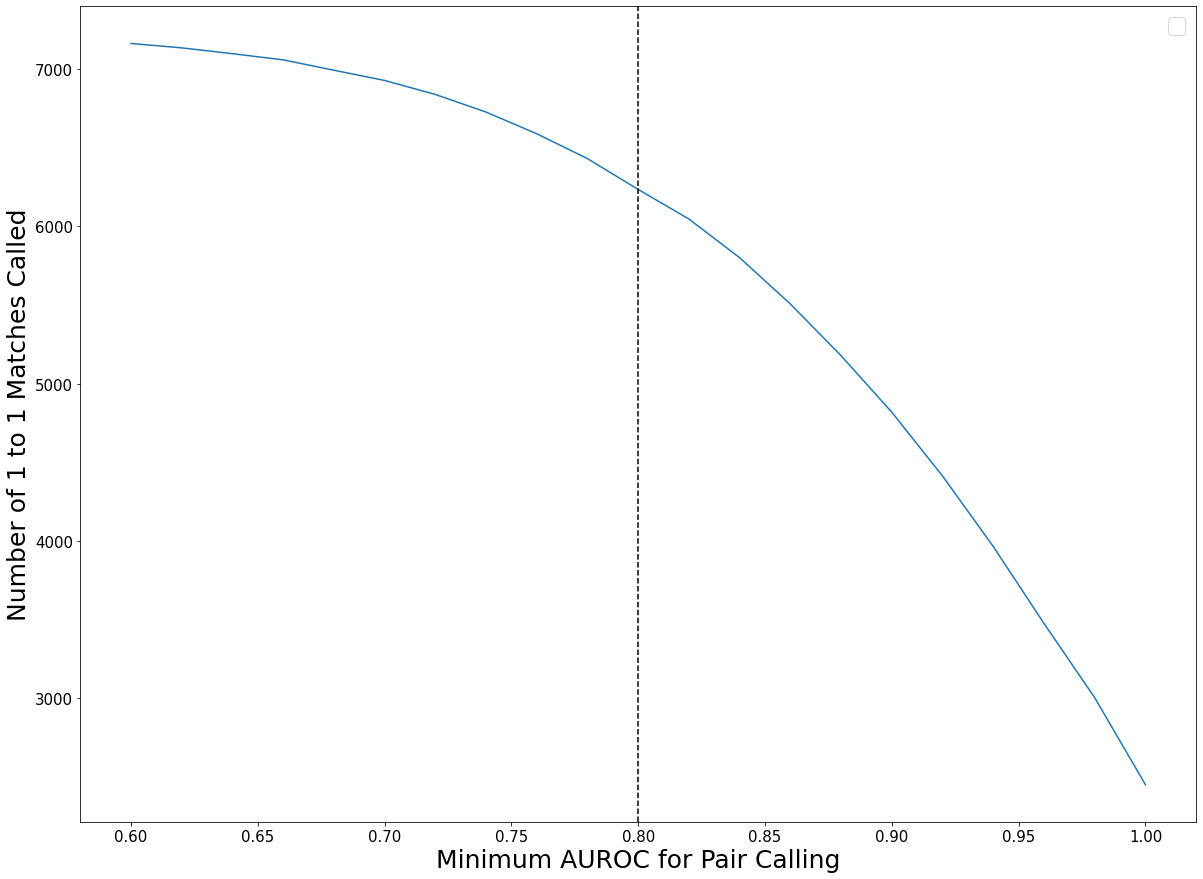

In [114]:

fig, ax = plt.subplots(figsize = (20,15))
sns.lineplot(data = plot_line_df, x = 'Minimum AUROC',y = 'Number of Gene Pairs')
plt.axvline(.8, 0,7500,color = 'k', linestyle = '--')
plt.ylabel("Number of 1 to 1 Matches Called", fontsize = 25)
plt.xlabel("Minimum AUROC for Pair Calling", fontsize = 25)
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize= 22,markerscale = 2.5)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)

In [ ]:
dataframe_of_group = trimmed_all_gene_pairs_for_fc.loc[trimmed_all_gene_pairs_for_fc['Group Number'] == 129] # Come Back to 114,130, 26, 29, 78, 87

wide_format = dataframe_of_group.pivot(index = 'Arabidopsis',columns= 'Maize',values= 'Total Score')
wide_format

Maize,Zm00001d033637
Arabidopsis,
AT3G06460,0.486884
AT3G06470,0.798193


In [ ]:
dimensions_of_groups = []
for current_group in list(set(trimmed_all_gene_pairs_for_fc['Group Number'].to_list())):
    dataframe_of_group = trimmed_all_gene_pairs_for_fc.loc[trimmed_all_gene_pairs_for_fc['Group Number'] == current_group]
    dataframe_of_group = dataframe_of_group[['Arabidopsis','Maize','Total Score']]
    fixed_frame = dataframe_of_group.pivot(index = 'Arabidopsis',columns= 'Maize',values= 'Total Score')
    dimensions_of_groups.append(list(fixed_frame.shape))

KeyboardInterrupt: 

In [ ]:
group_dimension_dataframe = pd.DataFrame(dimensions_of_groups, columns = ['Number of Arabidopsis Genes','Number of Maize Genes'])
group_dimension_dataframe.to_csv('/home/passala/Gene_duplication_project/Code/Penelope_maize_meristem_project/Minor_tables/dimension_dataframe.csv',index = False)

(0.0, 5.0)

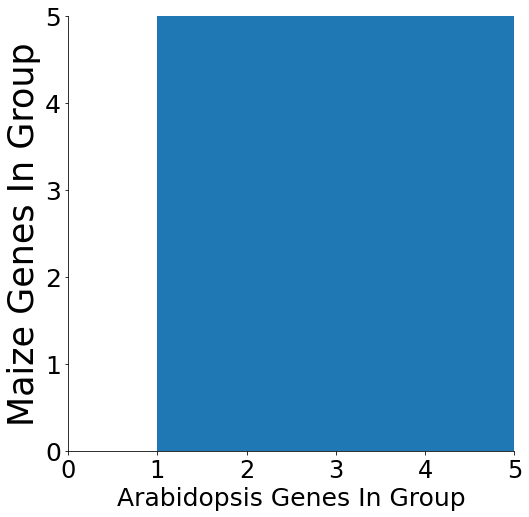

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
plt.hist( x = group_dimension_dataframe['Number of Arabidopsis Genes'],bins = 10)
plt.ylabel("Maize Genes In Group", fontsize = 35)
plt.xlabel("Arabidopsis Genes In Group", fontsize = 25)
sns.despine()

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 25)
plt.xlim(0,5)
plt.ylim(0,5)


In [ ]:
avg_rank = maize_cococonet_ranked.loc[[current_maize_gene],maize_cococonet_ranked.index.isin(finger_print_genes)]

In [ ]:
other_avg_rank = maize_cococonet_ranked.loc[maize_cococonet_ranked.index.isin(finger_print_genes),[current_maize_gene]]

In [ ]:
avg_rank

""
Zm00001d000143


In [ ]:
other_avg_rank

,Zm00001d000143


In [ ]:
finger_print_genes

['AT2G42120',
 'AT5G07400',
 'AT1G80380',
 'AT4G32700',
 'AT3G42170',
 'AT5G56740',
 'AT5G17410',
 'AT3G14890',
 'AT1G03687',
 'AT1G77620']

In [ ]:
maize_cococonet_ranked

,Zm00001d027259,Zm00001d027267,Zm00001d027268,Zm00001d027276,Zm00001d027281,Zm00001d027283,Zm00001d027290,Zm00001d027291,Zm00001d027292,Zm00001d027293,...,Zm00001d000408,Zm00001d000424,Zm00001d000428,Zm00001d000430,Zm00001d000434,Zm00001d000435,Zm00001d000436,Zm00001d000439,Zm00001d000443,Zm00001d000447
Zm00001d027259,13664.0,7268.0,8155.0,7253.0,9417.0,4607.0,2664.0,1058.0,6963.0,7236.0,...,6800.0,1357.0,12753.0,2801.0,3742.0,13133.0,10012.0,3314.0,9813.0,3584.0
Zm00001d027267,6249.0,13664.0,11493.0,13560.0,2701.0,8846.0,11507.0,12099.0,8817.0,9350.0,...,12596.0,11592.0,8473.0,10959.0,11901.0,6432.0,6838.0,12930.0,5714.0,6847.0
Zm00001d027268,3304.0,3753.0,13664.0,947.0,2622.0,2535.0,1936.0,12400.0,13255.0,2773.0,...,2844.0,1810.0,1200.0,5074.0,5851.0,2714.0,2200.0,2066.0,4692.0,952.0
Zm00001d027276,6454.0,13624.0,3583.0,13664.0,8808.0,9876.0,11472.0,6804.0,3653.0,12460.0,...,10851.0,12823.0,9496.0,9242.0,11451.0,8749.0,10060.0,12406.0,4689.0,11666.0
Zm00001d027281,3064.0,291.0,1629.0,1905.0,13664.0,9881.0,4955.0,9287.0,3971.0,772.0,...,857.0,870.0,2706.0,150.0,3019.0,2127.0,1978.0,5081.0,3018.0,5404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001d000435,12233.0,6761.0,6817.0,9783.0,7149.0,5721.0,5434.0,3015.0,5076.0,10305.0,...,9870.0,6084.0,11313.0,8865.0,4373.0,13664.0,13662.0,5445.0,7717.0,2282.0
Zm00001d000436,9953.0,9539.0,7249.0,12619.0,8706.0,6952.0,4518.0,4497.0,4494.0,12712.0,...,11722.0,9836.0,11872.0,13382.0,5798.0,13643.0,13664.0,12912.0,9284.0,5879.0
Zm00001d000439,2983.0,10290.0,4306.0,8672.0,11529.0,8638.0,2580.0,7433.0,8682.0,8991.0,...,9238.0,5168.0,5460.0,9524.0,9609.0,3880.0,7252.0,13664.0,4036.0,11509.0
Zm00001d000443,9314.0,7140.0,13179.0,5502.0,11593.0,13039.0,12663.0,12609.0,7996.0,5790.0,...,4502.0,5295.0,7664.0,8629.0,2668.0,8639.0,8691.0,7525.0,13664.0,1472.0


In [ ]:
maize_cococonet_cheater.loc[current_maize_gene,:]

NameError: name 'maize_cococonet_cheater' is not defined

In [ ]:
maize_cococonet_cheater.loc['Zm00001d027232','Zm00001d027231']

In [ ]:
for top_10_set in top_10_arab_genes_as_maize.iterrows():
    maize_coconet_current_fingerprint = maize_cococonet_ranked.loc[dictionary_mapper_arab_to_maize[top_10_set[0]],maize_cococonet_ranked.index.isin(top_10_set[1].to_list()),]
    current_average_rank = maize_coconet_current_fingerprint.mean()
    all_pairs_to_evaluate_for_functional_conservation["Arabidopsis Score"].loc[(all_pairs_to_evaluate_for_functional_conservation["Arabidopsis"] == top_10_set[0]) & all_pairs_to_evaluate_for_functional_conservation["Duplicate Location"].isin([np.nan, "M1"])] = current_average_rank


In [ ]:
all_pairs_to_evaluate_for_functional_conservation

In [ ]:
maize_arab_map